In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import random

# Problem 1

In this problem, you will perform simulations of two random walkers on a 2-d lattice.  The walkers randomly choose any neighboring site to move to in their next step, simultaneously.  You are free to choose the initial locations of both walkers, but should describe the initial conditions in your solutions.  You should perform $N$ copies of the simulation described, where you are free to choose $N$ so that the statistics of your simulation are "reasonable" (and specify $N$ and your reasoning for choosing it in the solutions). 

In [2]:
class RandomWalk():
    
    def __init__(self, x0, y0):
        
        self.x0 = x0
        self.y0 = y0
    
    def calc_squared_dist(self, x, y):
        dx = x - self.x0
        dy = y - self.y0
        return dx**2 + dy**2
    
    def preform_walk(self, nsteps, plot = False):
        """
        Preform a unbiased random walk on a 2D plane with nsteps. Returns an array of positions and overall mean position
        """
        
        # Initialize system
        self.nsteps = nsteps
        x = [self.x0]
        y = [self.y0]
        r2 = [self.calc_squared_dist(x[0],y[0])]
        
        for i in range(1, self.nsteps):
            
            # Take a step
            val = random.randint(1, 4)
            if val == 1:
                x.append(x[i - 1] + 1)
                y.append(y[i - 1])
            elif val == 2:
                x.append(x[i - 1] - 1)
                y.append(y[i - 1])
            elif val == 3:
                x.append(x[i - 1])
                y.append(y[i - 1] + 1)
            else:
                x.append(x[i - 1])
                y.append(y[i - 1] - 1)
    
            # Calculate and record squared distance travled
            r2.append(self.calc_squared_dist(x[i],y[i]))
        
        if plot:
            pylab.title(f"Random Walk (n = {self.nsteps} steps)")
            pylab.plot(x, y)
            pylab.show()
            
        return np.array(x), np.array(y), np.array(r2)

# a) 

Defining $\mathbf{x}_n$ and $\mathbf{y}_n$ the position of the first and second walker (respectively) after the $n^{th}$ step, plot $\langle(\mathbf{x}_n-\mathbf{x}_0)^2\rangle$, $\langle(\mathbf{y}_n-\mathbf{y}_0)^2\rangle$, and $\langle((\mathbf{x}_n-\mathbf{y}_n)-(\mathbf{x}_0-\mathbf{y}_0))^2\rangle$ in the same figure, with axes labeled and standard errors shown.  Comment on the effective diffusion coefficient of these three processes.

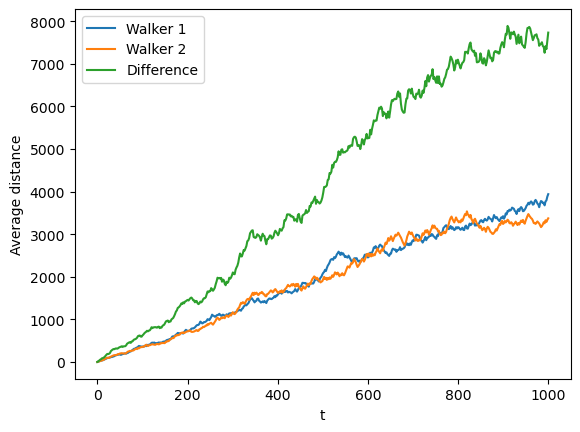

In [3]:
# Initialize simulation parameters / structures
nsim = 1000
nsteps = 500
w1_avgs = np.zeros(nsteps)
w2_avgs = np.zeros(nsteps)
diff_avgs = np.zeros(nsteps)
walker1 = RandomWalk(0,0)
walker2 = RandomWalk(0,0)

# Preform simulations
for i in range(1, nsim):
    
    # Preform walk, record positions
    w1_x, w1_y, w1_r2 = walker1.preform_walk(nsteps)
    w2_x, w2_y, w2_r2 = walker2.preform_walk(nsteps)
    diff_r2 = (w1_x-w2_x)**2 + (w1_y - w2_y)**2
    
    # Calculate average position for each walker as well as difference in position
    w1_avgs += w1_r2/i
    w2_avgs += w2_r2/i
    diff_avgs += diff_r2/i

# Plot
t = np.linspace(0, nsim, nsteps)
fig, ax = plt.subplots()
ax.plot(t, w1_avgs, label='Walker 1')
ax.plot(t, w2_avgs, label='Walker 2')
ax.plot(t, diff_avgs, label='Difference')
ax.set_xlabel('t')
ax.set_ylabel('Average distance')
ax.legend()
plt.show()

Diffusion coefficient for walker one is about 3.931
Diffusion coefficient for walker two is about 3.766
Diffusion coefficient for the difference is about 8.732


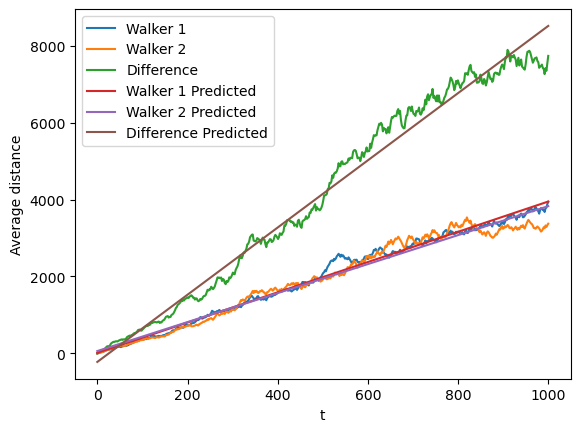

In [16]:
# Estimate the diffusion coefficient by preforming a linear regression
w1_fit = np.polyfit(t, w1_avgs, 1)
w1_diff_coeff = w1_fit[0]
print(f"Diffusion coefficient for walker one is about {round(w1_diff_coeff, 3)}")
w1_func = np.poly1d(w1_fit)
w1_predicted_y = w1_func(t)

w2_fit = np.polyfit(t, w2_avgs, 1)
w2_diff_coeff = w2_fit[0]
print(f"Diffusion coefficient for walker two is about {round(w2_diff_coeff, 3)}")
w2_func = np.poly1d(w2_fit)
w2_predicted_y = w2_func(t)

diff_fit = np.polyfit(t, diff_avgs, 1)
diff_diff_coeff = diff_fit[0]
print(f"Diffusion coefficient for the difference is about {round(diff_diff_coeff, 3)}")
diff_func = np.poly1d(diff_fit)
diff_predicted_y = diff_func(t)

#Plot
fig, ax = plt.subplots()
ax.plot(t, w1_avgs, label='Walker 1')
ax.plot(t, w2_avgs, label='Walker 2')
ax.plot(t, diff_avgs, label='Difference')
ax.plot(t, w1_predicted_y, label="Walker 1 Predicted")
ax.plot(t, w2_predicted_y, label="Walker 2 Predicted")
ax.plot(t, diff_predicted_y, label="Difference Predicted")
ax.set_xlabel('t')
ax.set_ylabel('Average distance')
ax.legend()
plt.show()

# b)

Based on your results in a), do you think that two random walkers will encounter each other (that is, occupy the same location) more often if both move, or if only one moves.  You should *not* try to answer this question by simulating more than was done in a), nor should you try to compute additional statistics beyond those computed in a).  Just explain your reasoning.

Given how the difference in position between the two walkers only grows with time, I would suspect that they would encounter each other more by if only one moves. 